# 2-高斯核函数

In [1]:
import matplotlib.pyplot as plt
from sklearn  import svm 
import numpy as np 
import pandas as pd
import seaborn as sns
import scipy.io as sio

<img src="gaussian.jpg">

In [2]:
#kernel funtion 高斯核函数
def gaussian_kernel(x1, x2, sigma):
    return np.exp(- np.power((x1 - x2), 2).sum() / (2 * (sigma ** 2)))

In [3]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

# load data

In [4]:
mat = sio.loadmat('./data/ex6data2.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [5]:
data.shape

(863, 3)

D:\Programming tools\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


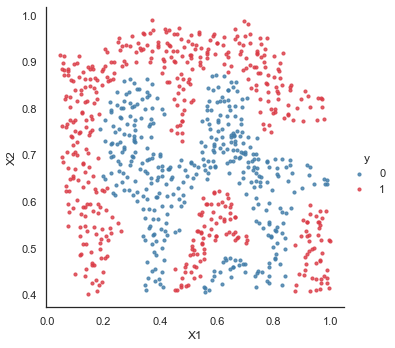

In [6]:
sns.set(context="notebook", style="white", palette=sns.diverging_palette(240, 10, n=2))
sns.lmplot('X1', 'X2', hue='y', data=data,
            height=5,
            fit_reg=False,
            scatter_kws={"s": 10}
            )

plt.show()

# try built-in Gaussian Kernel of sklearn

In [7]:
svc = svm.SVC(C=100, kernel='rbf', gamma=10, probability=True)  #C很大的时候容错能力越差，泛化能力越弱
svc

SVC(C=100, gamma=10, probability=True)

In [8]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.9698725376593279

In [9]:
predict_pred = svc.predict_proba(data[['X1', 'X2']])[:, 0]  #预测概率， 有几个分类就有几个概率

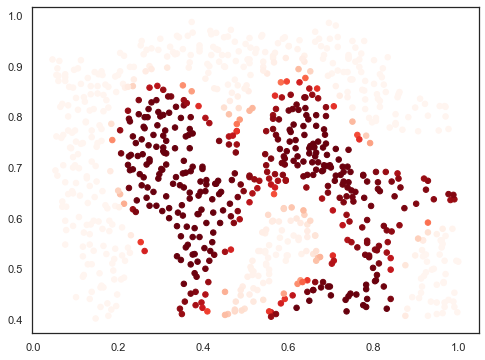

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(data['X1'], data['X2'], s=30, c=predict_pred, cmap='Reds')
plt.show()